Importando todas bibliotecas necessárias para execução do Projeto.

In [87]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2


Importando a Imagem e Padronizando para a base de cinza.

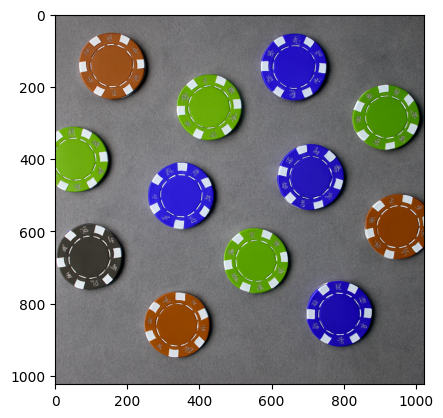

In [88]:
imagem_original = cv2.imread('circulos_1.png')
plt.imshow(imagem_original)

In [89]:
imagem_circulos = cv2.imread('circulos_1.png', cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

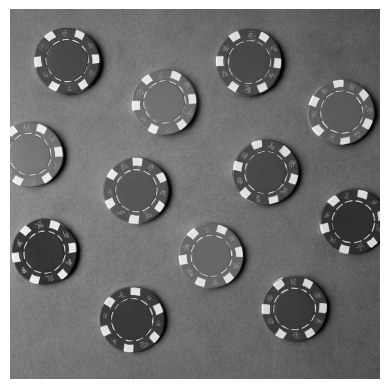

In [90]:
plt.imshow(imagem_circulos, cmap= 'gray')
plt.axis('off')

Copiar a imagem padronizada por boa prática.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

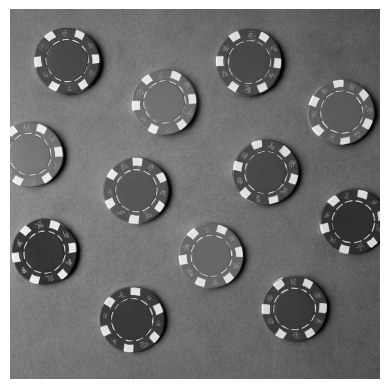

In [91]:
imagem_copia = (imagem_circulos)
plt.imshow(imagem_copia, cmap = 'gray')
plt.axis('off')

Aplicando o filtro da mediana a fim de tratar possíveis ruídos.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

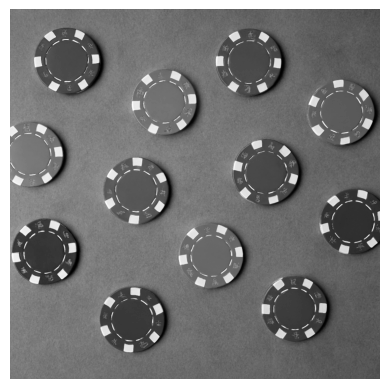

In [92]:
imagem_mediana = cv2.medianBlur(imagem_copia, 3)
plt.imshow(imagem_mediana, cmap = 'gray')
plt.axis('off')

Manipulando bordas da imagem com tratamento da Mediana

In [93]:
sobel_x = cv2.Sobel(imagem_mediana, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(imagem_mediana, cv2.CV_64F, 0, 1, ksize=5)

In [94]:
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

In [95]:
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255,
cv2.NORM_MINMAX)
sobel_magnitude = sobel_magnitude.astype(np.uint8)

Binarização das Bordas em Sobel

In [96]:
_, sobel_binarizar = cv2.threshold(sobel_magnitude, 50, 255,
cv2.THRESH_BINARY)

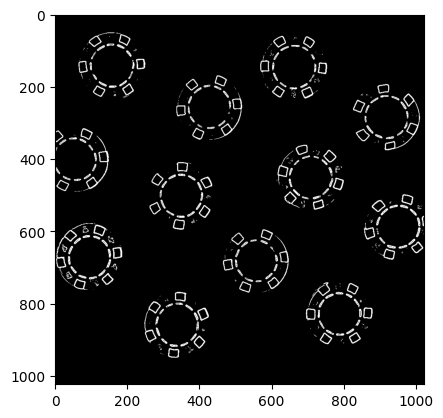

In [97]:
plt.imshow(sobel_binarizar, cmap= 'gray')



Identificar Circulos com o HOUGH CIRCLES

In [98]:
circles = cv2.HoughCircles(sobel_binarizar, cv2.HOUGH_GRADIENT, dp=1.1, minDist=200, param1=200, param2=40, minRadius=25, maxRadius=90)
print(circles)

[[[337.15     860.75      59.100002]
  [ 56.65     403.15      86.93    ]
  [556.05     682.55      58.77    ]
  [154.55     139.15001   89.35    ]
  [ 91.85     672.65      56.68    ]
  [659.45     146.85      59.100002]
  [924.55005  285.45      84.509995]
  [789.25     829.95      57.89    ]
  [425.15002  262.35      88.14    ]
  [348.15     502.15002   55.58    ]
  [712.25     444.95      63.940002]
  [946.55005  582.45      60.2     ]]]


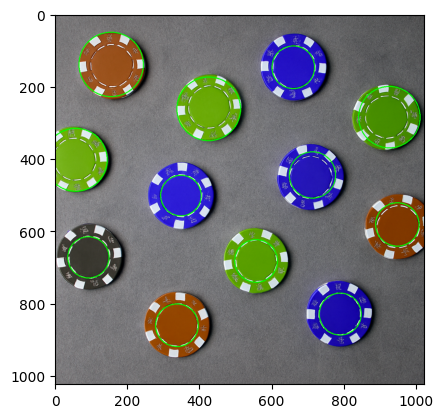

In [99]:
circles = np.uint16(np.around(circles))
circulos_imagem = imagem_original.copy()
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circulos_imagem,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    # cv2.circle(circulos_imagem,(i[0],i[1]),2,(255,0,0),10)
    
plt.imshow(circulos_imagem, cmap= 'gray')

Contagem dos Circulos contornados